<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/SciPy/blob/main/00_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SciPy : A Beginer Guide for Scientific Computing
======================================================
This covers the SciPy library, a powerful tool for scientific computing in Python.
We'll explore key submodules with practical examples, including signal processing, optimization,
integration, linear algebra, and statistics.

Author: Prashanna Raj Pandit

Date: March 17, 2025

In [11]:
# Import necessary libraries
import numpy as np
import scipy
from scipy import signal, optimize, integrate, linalg, stats, interpolate, fft, sparse,special
import matplotlib.pyplot as plt

# Check SciPy version
print(f"SciPy Version: {scipy.__version__}")

SciPy Version: 1.14.1


Section 1: SciPy Basics
======================
SciPy builds on NumPy and provides advanced functions for scientific tasks.
Key submodules include:
- signal: Signal processing (e.g., filtering, peak detection)
- optimize: Optimization (e.g., minimization)
- integrate: Numerical integration
- linalg: Linear algebra
- stats: Statistical functions

In [12]:
# Example: Generate a simple array with NumPy
x = np.linspace(0, 10, 100)
print("Sample NumPy array:", x[:5])

Sample NumPy array: [0.        0.1010101 0.2020202 0.3030303 0.4040404]


Section 2: Signal Processing with scipy.signal
===========================================
The signal submodule is great for analyzing time-series data, like smoothing signals
or detecting peaks. Useful for applications like gait analysis.

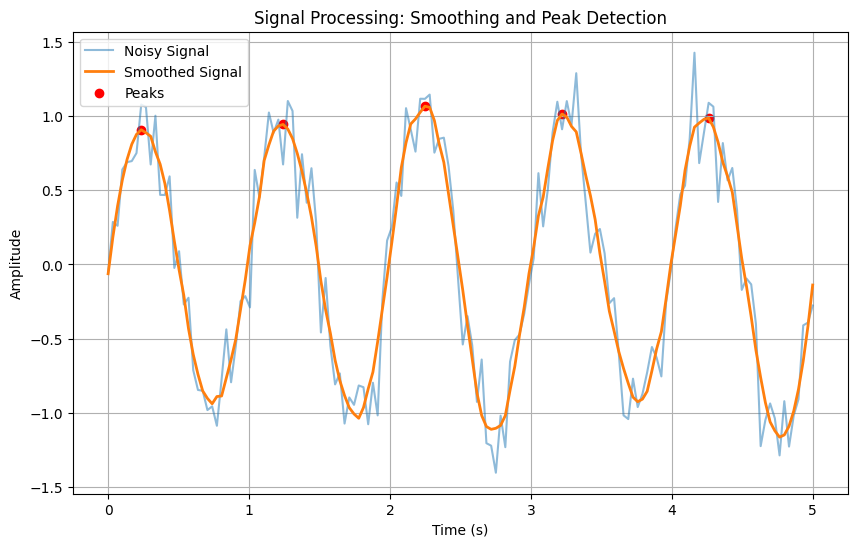

Detected Peaks at indices: [  7  37  67  96 127]


In [13]:
def smooth_signal(data, window_length=11, polyorder=2):
    """
    Smooth a signal using Savitzky-Golay filter.

    Parameters:
    -----------
    data : ndarray
        Input signal (e.g., time-series data).
    window_length : int
        Size of the smoothing window (must be odd).
    polyorder : int
        Polynomial order for fitting (must be less than window_length).

    Returns:
    --------
    ndarray
        Smoothed signal.
    """
    return signal.savgol_filter(data, window_length, polyorder)

# Generate noisy signal (simulating gait Y-coordinates)
t = np.linspace(0, 5, 150)  # 30 FPS -> 5 seconds = 150 frames
noisy_signal = np.sin(2 * np.pi * t) + 0.2 * np.random.randn(len(t))

# Smooth the signal
smoothed_signal = smooth_signal(noisy_signal, window_length=15, polyorder=2)

# Detect peaks
peaks, _ = signal.find_peaks(smoothed_signal, prominence=0.5, distance=20)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.5)
plt.plot(t, smoothed_signal, label="Smoothed Signal", linewidth=2)
plt.scatter(t[peaks], smoothed_signal[peaks], color="red", label="Peaks")
plt.title("Signal Processing: Smoothing and Peak Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

print(f"Detected Peaks at indices: {peaks}")


Section 3: Optimization with scipy.optimize
========================================
The optimize submodule solves minimization problems, like fitting curves or finding roots.

Optimization Result:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0
        x: [-1.000e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


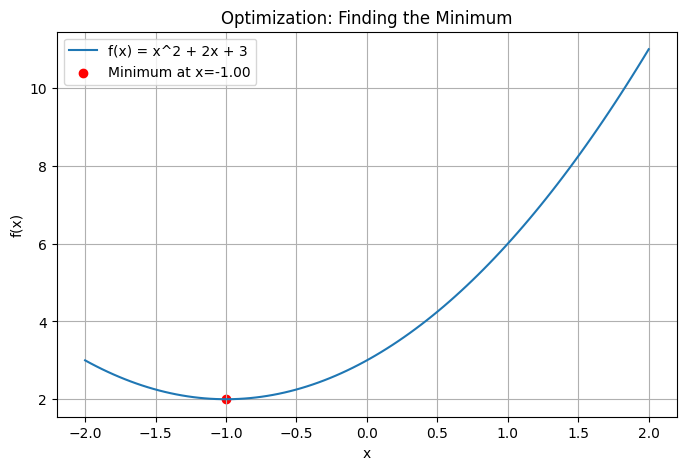

In [14]:
def quadratic_function(x, a=1, b=2, c=3):
    """
    Quadratic function: f(x) = ax^2 + bx + c

    Parameters:
    -----------
    x : float or ndarray
        Input value(s).
    a, b, c : float
        Coefficients of the quadratic equation.

    Returns:
    --------
    float or ndarray
        Function value(s).
    """
    return a * x**2 + b * x + c

# Minimize the quadratic function
result = optimize.minimize(quadratic_function, x0=0)  # Initial guess: x=0
print(f"Optimization Result:\n{result}")

# Plot the function and minimum
x_vals = np.linspace(-2, 2, 100)
y_vals = quadratic_function(x_vals)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = x^2 + 2x + 3")
plt.scatter(result.x, result.fun, color="red", label=f"Minimum at x={result.x[0]:.2f}")
plt.title("Optimization: Finding the Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Section 4: Numerical Integration with scipy.integrate
=================================================
The integrate submodule computes definite integrals, useful for areas under curves.

Integral of x^2 from 0 to 2: 2.6667 (Error: 2.96e-14)


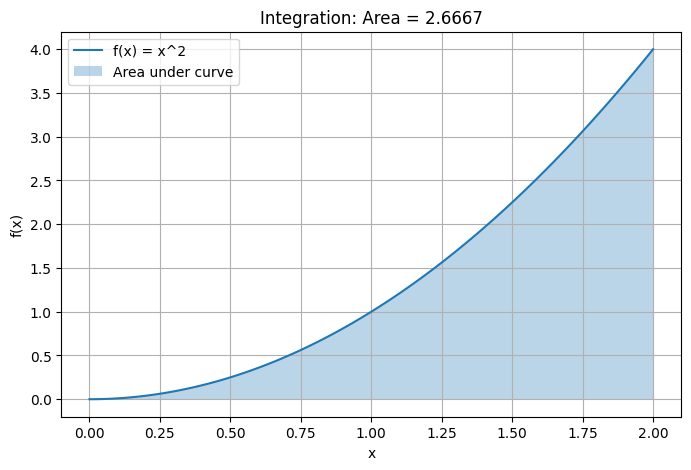

In [15]:
def integrand(x):
    """
    Function to integrate: f(x) = x^2

    Parameters:
    -----------
    x : float or ndarray
        Input value(s).

    Returns:
    --------
    float or ndarray
        Function value(s).
    """
    return x**2

# Compute definite integral from 0 to 2
integral_result, error = integrate.quad(integrand, 0, 2)
print(f"Integral of x^2 from 0 to 2: {integral_result:.4f} (Error: {error:.2e})")

# Plot the function and area
x_vals = np.linspace(0, 2, 100)
y_vals = integrand(x_vals)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = x^2")
plt.fill_between(x_vals, y_vals, alpha=0.3, label="Area under curve")
plt.title(f"Integration: Area = {integral_result:.4f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Section 5: Linear Algebra with scipy.linalg
========================================
The linalg submodule handles matrix operations, like solving systems of equations.

In [16]:
def solve_linear_system(A, b):
    """
    Solve the linear system Ax = b.

    Parameters:
    -----------
    A : ndarray
        Coefficient matrix (n x n).
    b : ndarray
        Right-hand side vector (n).

    Returns:
    --------
    ndarray
        Solution vector x.
    """
    return linalg.solve(A, b)

# Define a 2x2 system: 2x + y = 5, x + 3y = 7
A = np.array([[2, 1], [1, 3]])
b = np.array([5, 7])

# Solve
x = solve_linear_system(A, b)
print(f"Solution: x = {x[0]:.2f}, y = {x[1]:.2f}")

# Verify
print("Verification (Ax):", np.dot(A, x))

Solution: x = 1.60, y = 1.80
Verification (Ax): [5. 7.]


Section 6: Statistics with scipy.stats
====================================
The stats submodule provides statistical functions, like distributions and tests.

Mean: -0.03, Std Dev: 1.00
T-test: t-statistic = -0.80, p-value = 0.4215


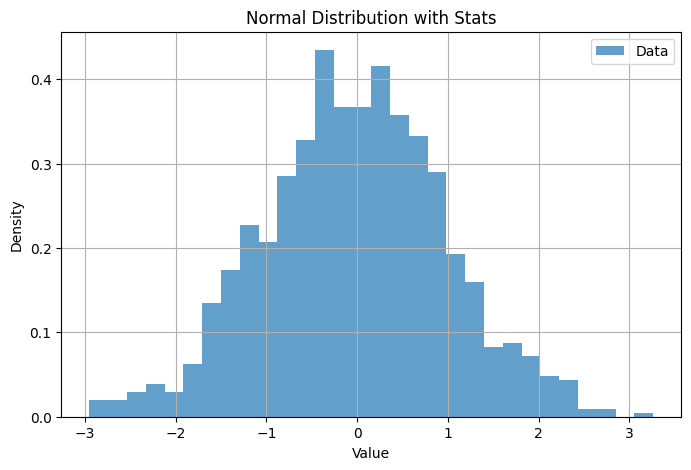

In [17]:
def generate_normal_data(mu=0, sigma=1, size=1000):
    """
    Generate random samples from a normal distribution.

    Parameters:
    -----------
    mu : float
        Mean of the distribution.
    sigma : float
        Standard deviation.
    size : int
        Number of samples.

    Returns:
    --------
    ndarray
        Random samples.
    """
    return stats.norm.rvs(loc=mu, scale=sigma, size=size)

# Generate normal data
data = generate_normal_data(mu=0, sigma=1, size=1000)

# Compute statistics
mean = np.mean(data)
std = np.std(data)
print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")

# Perform a t-test (example: compare to mean=0)
t_stat, p_value = stats.ttest_1samp(data, 0)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.7, label="Data")
plt.title("Normal Distribution with Stats")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Advanced:

Section 1: Interpolation with scipy.interpolate
============================================
The interpolate submodule fits smooth curves to discrete data, useful for filling gaps
in time-series data like gait coordinates.

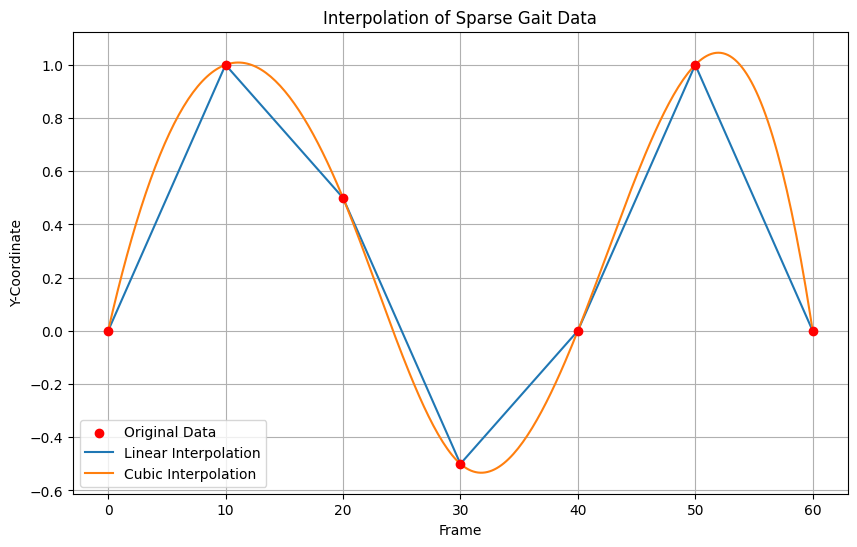

In [18]:
def interpolate_gait_data(x, y, kind='cubic'):
    """
    Interpolate discrete data points using a specified method.

    Parameters:
    -----------
    x : ndarray
        Independent variable (e.g., time or frames).
    y : ndarray
        Dependent variable (e.g., Y-coordinates).
    kind : str
        Interpolation type ('linear', 'cubic', etc.).

    Returns:
    --------
    scipy.interpolate.interpolate
        Interpolation function.
    """
    return interpolate.interp1d(x, y, kind=kind, fill_value="extrapolate")

# Simulate sparse gait data (e.g., heel Y-coordinates with gaps)
frames = np.array([0, 10, 20, 30, 40, 50, 60])  # Sparse frames
y_coords = np.array([0, 1, 0.5, -0.5, 0, 1, 0])  # Simulated Y-values
t_fine = np.linspace(0, 60, 300)  # High-resolution time

# Interpolate
interp_linear = interpolate_gait_data(frames, y_coords, kind='linear')
interp_cubic = interpolate_gait_data(frames, y_coords, kind='cubic')

# Compute interpolated values
y_linear = interp_linear(t_fine)
y_cubic = interp_cubic(t_fine)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(frames, y_coords, color="red", label="Original Data", zorder=5)
plt.plot(t_fine, y_linear, label="Linear Interpolation")
plt.plot(t_fine, y_cubic, label="Cubic Interpolation")
plt.title("Interpolation of Sparse Gait Data")
plt.xlabel("Frame")
plt.ylabel("Y-Coordinate")
plt.legend()
plt.grid()
plt.show()

Section 2: Fast Fourier Transform with scipy.fft
=============================================
The fft submodule analyzes frequency components in signals, great for detecting periodic
patterns in gait cycles.

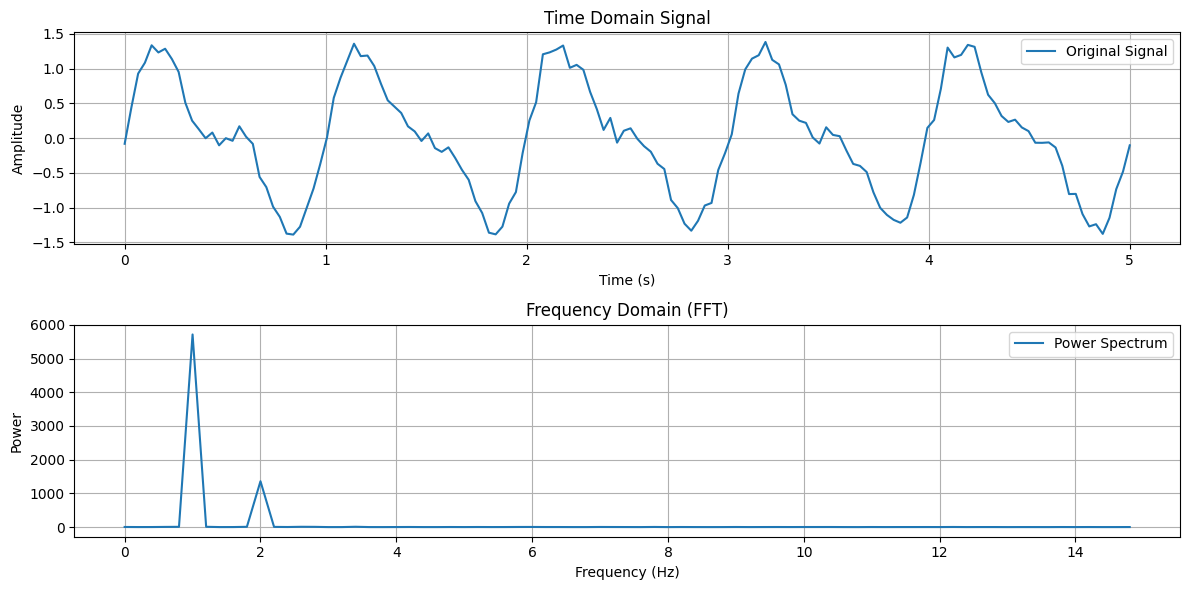

Dominant frequencies: 1.00 Hz


In [19]:
def compute_fft(signal_data, fs):
    """
    Compute the FFT and frequency spectrum of a signal.

    Parameters:
    -----------
    signal_data : ndarray
        Input signal (e.g., Y-coordinates over time).
    fs : float
        Sampling frequency (e.g., frames per second).

    Returns:
    --------
    freq : ndarray
        Frequency bins.
    power : ndarray
        Power spectrum (magnitude squared).
    """
    n = len(signal_data)
    fft_result = fft.fft(signal_data)
    freq = fft.fftfreq(n, d=1/fs)
    power = np.abs(fft_result)**2
    return freq[:n//2], power[:n//2]  # Positive frequencies only

# Generate periodic signal (e.g., gait oscillation)
t = np.linspace(0, 5, 150)  # 5 seconds at 30 FPS
signal_data = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 2 * t) + 0.1 * np.random.randn(len(t))

# Compute FFT
freq, power = compute_fft(signal_data, fs=30)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data, label="Original Signal")
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, power, label="Power Spectrum")
plt.title("Frequency Domain (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f"Dominant frequencies: {freq[np.argmax(power)]:.2f} Hz")